# Systems modeling of relationship between domain work, flow work, friction and total value

## Assumptions / Model

1. Constant funding for each iteration
2. Funding flows into two kinds of work
    - Domain (Ideal): Work for externally & directly observable changes. Feature work, App development, Business logic etc...
    - Flow: Refactoring, pipeline optimization, etc...
3. Actual domain work done is less than ideal due to friction
4. Domain work adds to cumulative value (linearly)
5. Flow work translates to some refactoring value
6. Friction is increased by domain work and also decreased by refactoring value

## Variables

1. Proportion of work that goes into domain work vs flow work
2. Rate of cruft introduced by domain work

## Observations

- If you have no time for flow work, increase in cumulative value slows down possibly to a halt
- A percentage of time for flow work can increase domain work and cumulative total value delivered with the same funding
- Teams that can introduce less cruft with the same effort will slow down less

## Remarks

- Software work inevitably creates cruft and have impact on future changes. If you don't hold this view, this model is not very meaningful. You can ask teams on the ground or read something like https://www.industriallogic.com/blog/how-to-understand-refactoring/ and Mythical Man-Month.
- Realistically most of the time software work does not translate to value linearly.
- Percentages are expressed in decimal

In [140]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML, display_html
import pandas as pd
import matplotlib.pyplot as plt

In [141]:


def model_refactoring(descriptions, domain_developers_percentage, friction_from_domain_work_rate):
    print("\n".join(descriptions))
    args = pd.DataFrame([{
        "domain_developers_percentage": domain_developers_percentage,
        "friction_from_domain_work_rate": friction_from_domain_work_rate
    }])
    print(args.to_string(index=False))
    
    total_developers_count = 1000
    domain_developers = int(domain_developers_percentage * total_developers_count)
    flow_developers = int(total_developers_count - domain_developers)
    iterations = 300

    spec = """

    # Constant funding
    [Funding] > Developers({total_developers_count}) @ {total_developers_count}
    
    # Funding flows into work
    ## Ideal domain work that is directly observable by users if there were no friction
    Developers > IdealDomainWork @ {domain_developers}
    ## Flow work includes refactoring, pipeline optimization
    Developers > FlowWork @ {flow_developers}

    # Actual domain work is less that ideal due to friction
    IdealDomainWork         > [Sink] @ Conversion(1)
    [calculateDomainWork]   > DomainWork @ (IdealDomainWork - Friction)
    
    # Domain work increases total value
    # 0.05 is an arbitrary number for line to fit in graph nicely
    DomainWork              > TotalValue @ Conversion(0.05)
    
    # FlowWork translates to refactoring value in some way
    FlowWork                > [Sink2] @ Conversion(1)
    [Refactor]              > Refactoring(0, Friction) @ FlowWork
    
    # Friction is increased by DomainWork and reduced by Refactoring
    Refactoring             > [Sink3] @ Conversion(1)
    [WorkFriction]          > Friction @ (DomainWork * {friction_from_domain_work_rate} - Refactoring)

    """.format(total_developers_count=total_developers_count, domain_developers=domain_developers, flow_developers=flow_developers, friction_from_domain_work_rate=friction_from_domain_work_rate)
    # print(spec)
    model = parse(spec)

    results = model.run(rounds=iterations)
    df = pd.DataFrame.from_records(results)

    result = df
    table = pd.concat([result.head(7), result.tail(4)])
    table = table[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'Friction', 'TotalValue', 'Refactoring']]
    display_html(table)
    df[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'TotalValue']].plot(figsize=(24, 4))
    plt.show()
    print("---------------------------------------------")
    return [[descriptions], df]
    

No flow work
Domain work decreases
Increase in total value decelerates
 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.01


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,1000,0,1000,0.000000,0.000000,0,0
2,1000,0,1000,1000.000000,0.000000,0,0
3,1000,0,1000,1000.000000,10.000000,50,0
4,1000,0,1000,990.000000,20.000000,100,0
5,1000,0,1000,980.000000,29.900000,149,0
6,1000,0,1000,970.100000,39.700000,198,0
297,1000,0,1000,50.539385,949.971166,4603,0
298,1000,0,1000,50.028834,950.476560,4605,0
299,1000,0,1000,49.523440,950.976848,4607,0


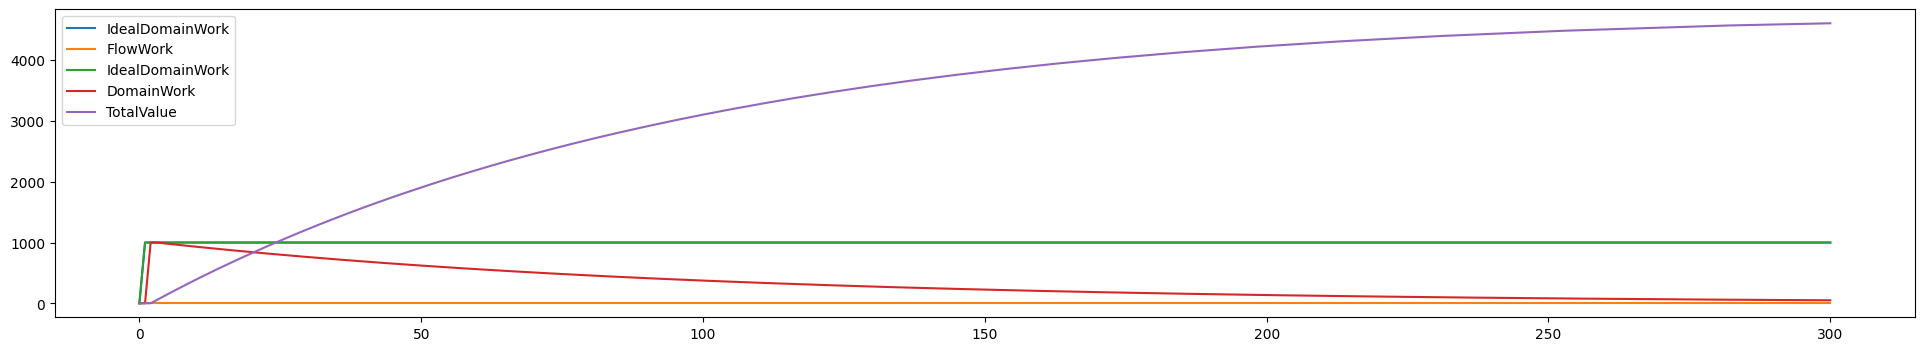

---------------------------------------------
Double the rate of cruft, effect is faster felt
 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,1000,0,1000,0.000000,0.000000,0,0
2,1000,0,1000,1000.000000,0.000000,0,0
3,1000,0,1000,1000.000000,20.000000,50,0
4,1000,0,1000,980.000000,40.000000,100,0
5,1000,0,1000,960.000000,59.600000,149,0
6,1000,0,1000,940.400000,78.800000,197,0
297,1000,0,1000,7.089555,1005.991722,2382,0
298,1000,0,1000,7.089555,1006.133513,2382,0
299,1000,0,1000,7.089555,1006.275304,2382,0


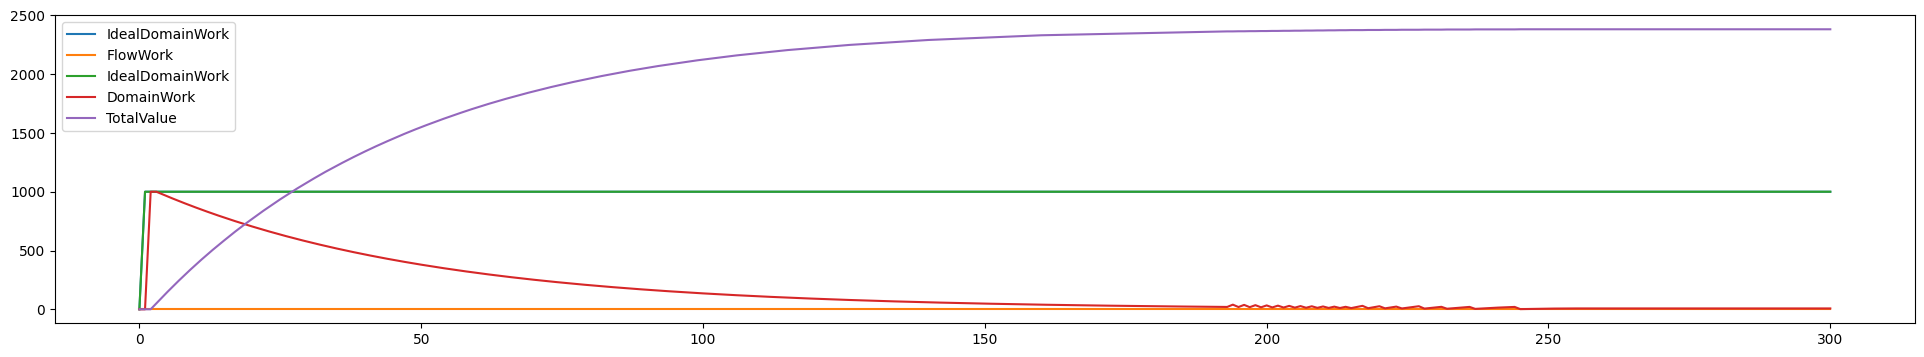

---------------------------------------------
Some flow work
Domain work approaches ideal
 domain_developers_percentage  friction_from_domain_work_rate
                        0.995                            0.01


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,995,5,995,0.000000,0.000000,0,0
2,995,5,995,995.000000,0.000000,0,0
3,995,5,995,995.000000,9.950000,49,0
4,995,5,995,985.050000,19.900000,98,5
5,995,5,995,975.100000,24.750500,147,5
6,995,5,995,970.249500,29.501500,195,5
297,995,5,995,524.498602,470.748884,9531,5
298,995,5,995,524.251116,470.993870,9557,5
299,995,5,995,524.006130,471.236381,9583,5


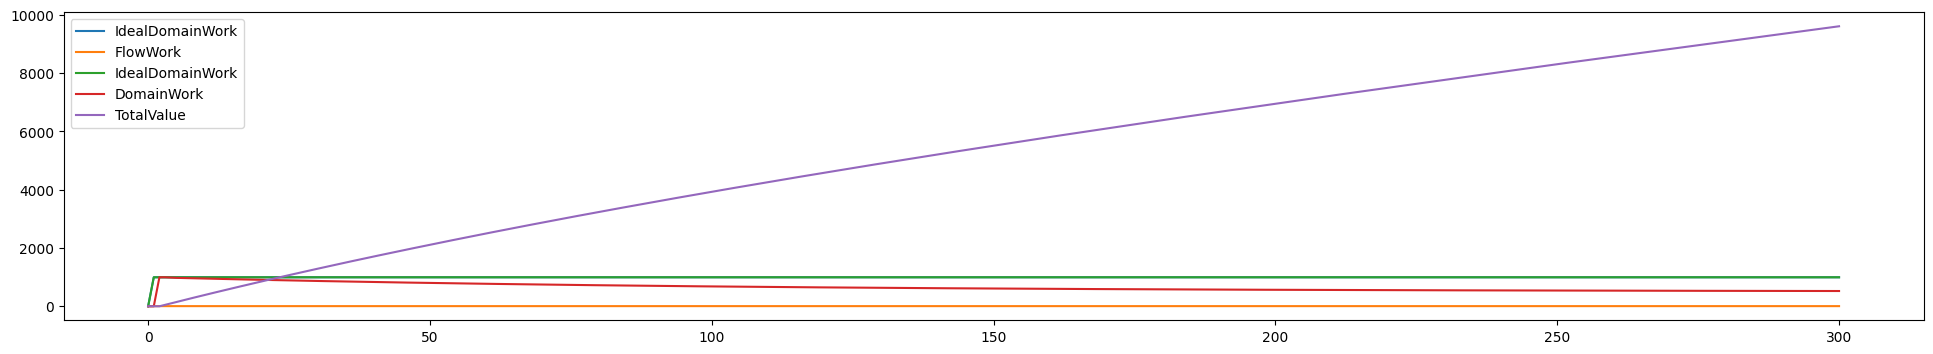

---------------------------------------------
Higher rate of cruft
 domain_developers_percentage  friction_from_domain_work_rate
                        0.995                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,995,5,995,0.000000,0.000000,0,0
2,995,5,995,995.000000,0.000000,0,0
3,995,5,995,995.000000,19.900000,49,0
4,995,5,995,975.100000,39.800000,98,5
5,995,5,995,955.200000,54.302000,146,5
6,995,5,995,940.698000,68.406000,193,5
297,995,5,995,251.707290,743.327568,5359,5
298,995,5,995,251.672432,743.361714,5371,5
299,995,5,995,251.638286,743.395162,5383,5


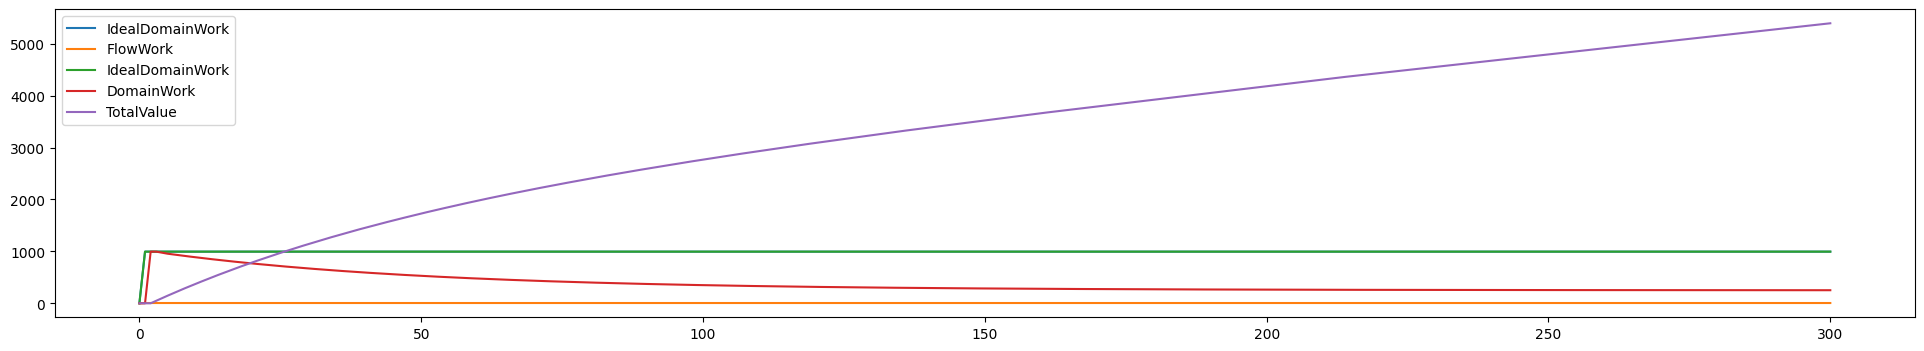

---------------------------------------------
More flow work
 domain_developers_percentage  friction_from_domain_work_rate
                         0.99                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,990,10,990,0.000000,0.000000,0,0
2,990,10,990,990.000000,0.000000,0,0
3,990,10,990,990.000000,19.800000,49,0
4,990,10,990,970.200000,39.600000,98,10
5,990,10,990,950.400000,49.004000,146,10
6,990,10,990,940.996000,58.012000,193,10
297,990,10,990,501.090061,488.932195,8428,10
298,990,10,990,501.067805,488.953996,8453,10
299,990,10,990,501.046004,488.975352,8478,10


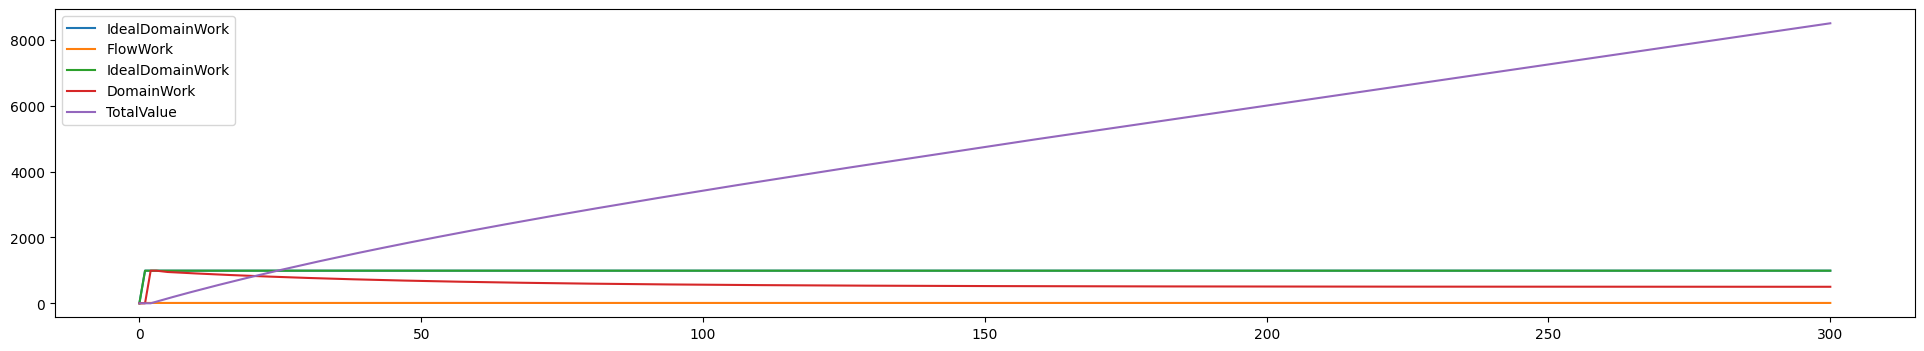

---------------------------------------------
More flow work
 domain_developers_percentage  friction_from_domain_work_rate
                        0.985                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,985,15,985,0.000000,0.000000,0,0
2,985,15,985,985.000000,0.000000,0,0
3,985,15,985,985.000000,19.700000,49,0
4,985,15,985,965.300000,39.400000,98,15
5,985,15,985,945.600000,43.706000,146,15
6,985,15,985,941.294000,47.618000,193,15
297,985,15,985,750.472832,234.536822,11411,15
298,985,15,985,750.463178,234.546279,11448,15
299,985,15,985,750.453721,234.555542,11485,15


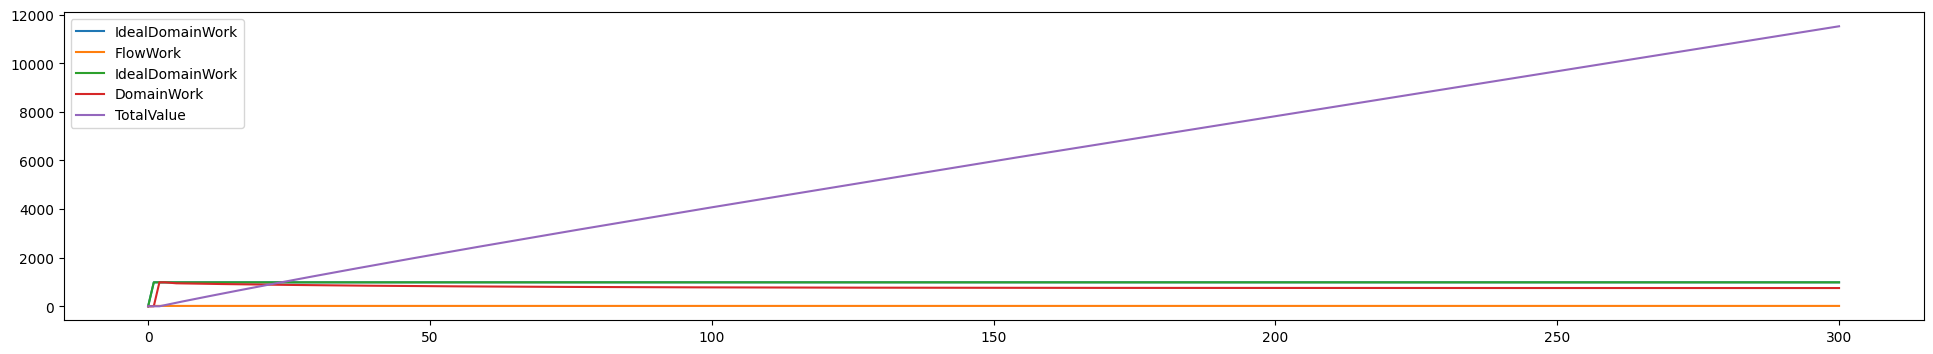

---------------------------------------------
More flow work
 domain_developers_percentage  friction_from_domain_work_rate
                         0.98                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,980,20,980,0.0,0.0,0,0.0
2,980,20,980,980.0,0.0,0,0.0
3,980,20,980,980.0,19.6,49,0.0
4,980,20,980,960.4,39.2,98,19.6
5,980,20,980,940.8,39.2,146,20.0
6,980,20,980,940.8,39.2,193,20.0
297,980,20,980,940.8,39.2,13870,20.0
298,980,20,980,940.8,39.2,13917,20.0
299,980,20,980,940.8,39.2,13964,20.0


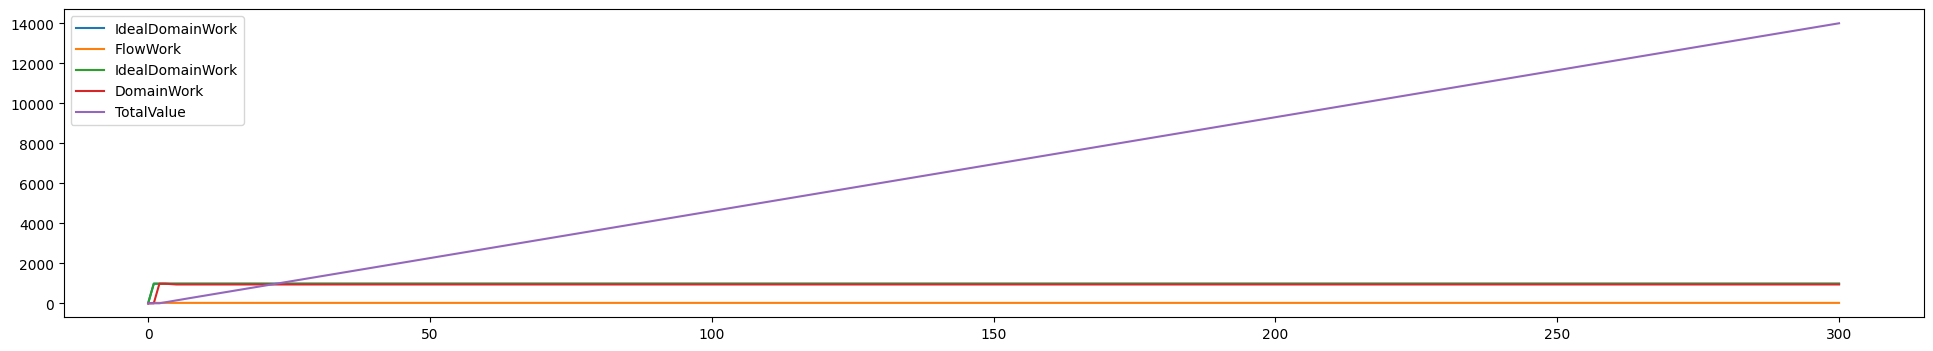

---------------------------------------------
More flow work
 domain_developers_percentage  friction_from_domain_work_rate
                        0.975                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,975,25,975,0.0,0.0,0,0.0
2,975,25,975,975.0,0.0,0,0.0
3,975,25,975,975.0,19.5,48,0.0
4,975,25,975,955.5,39.0,96,19.5
5,975,25,975,936.0,39.0,143,25.0
6,975,25,975,936.0,39.0,189,25.0
297,975,25,975,936.0,39.0,13575,25.0
298,975,25,975,936.0,39.0,13621,25.0
299,975,25,975,936.0,39.0,13667,25.0


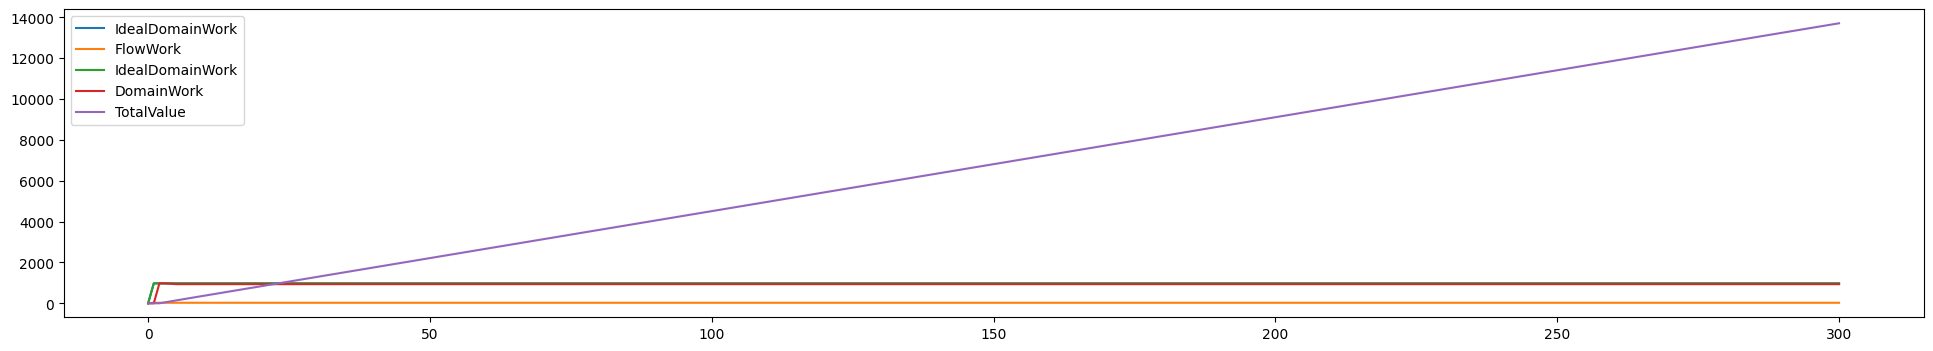

---------------------------------------------
More flow work
 domain_developers_percentage  friction_from_domain_work_rate
                         0.97                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,970,30,970,0.0,0.0,0,0.0
2,970,30,970,970.0,0.0,0,0.0
3,970,30,970,970.0,19.4,48,0.0
4,970,30,970,950.6,38.8,96,19.4
5,970,30,970,931.2,38.8,143,30.0
6,970,30,970,931.2,38.8,189,30.0
297,970,30,970,931.2,38.8,13575,30.0
298,970,30,970,931.2,38.8,13621,30.0
299,970,30,970,931.2,38.8,13667,30.0


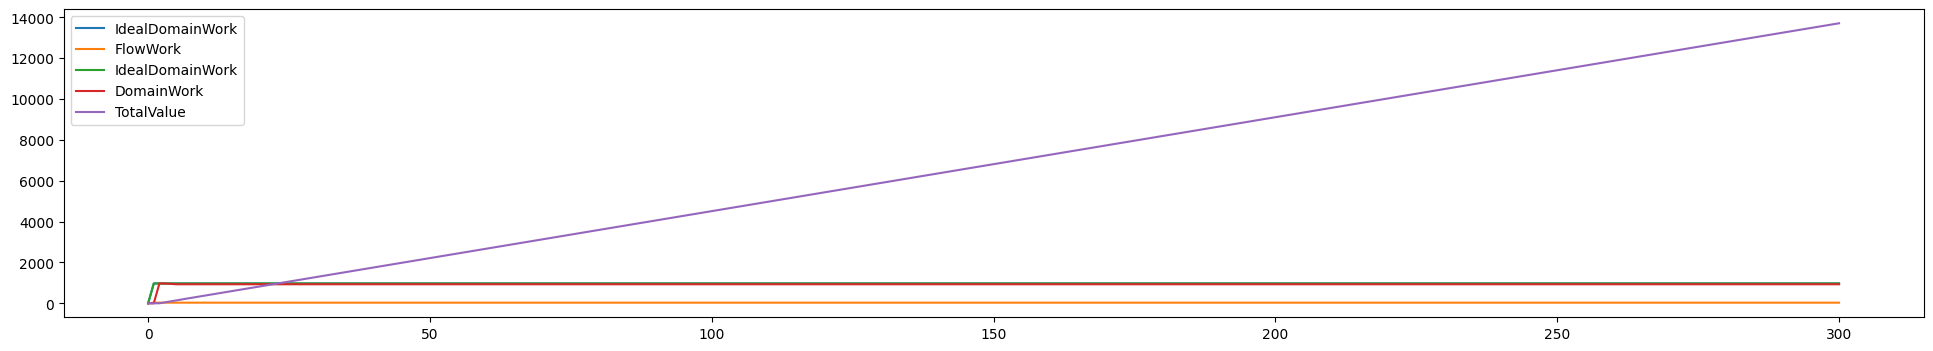

---------------------------------------------


In [142]:
param_sets = [
    [["No flow work", "Domain work decreases", "Increase in total value decelerates"], 1,0.01], 
    [["Double the rate of cruft, effect is faster felt"], 1, 0.02], 
    [["Some flow work", "Domain work approaches ideal"], 0.995, 0.01], 
    [["Higher rate of cruft"], 0.995, 0.02], 
    [["More flow work"], 0.99, 0.02],
    [["More flow work"], 0.985, 0.02],
    [["More flow work"], 0.98, 0.02],
    [["More flow work"], 0.975, 0.02],
    [["More flow work"], 0.97, 0.02]
    ]

results = [model_refactoring(*param_set) for param_set in param_sets]



In [189]:
table = pd.concat([result[1].iloc[-1:] for result in results])

table[['IdealDomainWork', 'FlowWork', 'DomainWork', 'Friction', 'Refactoring', 'TotalValue']].style.hide()


[pd.concat([result[1].iloc[-1:], pd.DataFrame([{"D": ". ".join(result[0][0])}])], axis=1) for result in results][0]

,Funding,Developers,IdealDomainWork,FlowWork,Sink,calculateDomainWork,DomainWork,TotalValue,Sink2,Refactor,Refactoring,Sink3,WorkFriction,Friction,D
300,inf,1000.0,1000.0,0.0,inf,inf,49.023152,4609.0,inf,inf,0.0,inf,inf,951.472083,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No flow work. Domain work decreases. Increase ...


- 